# **DotaBuddies**

A DOTA2 machine learning project by David Roper 40131739


COMP432 W

Professor: Dr. Mirco Ravanelli


 Project Advisor: Luca Della Libera

## **Abstract**
 

   The goal of the DotaBuddies project was to create a machine learning model that can correctly predict the outcome of a DOTA2 match based on the heroes picked for each team, with future development of using the model for a hero recommendation application. Two different DNN (deep neural network) models were tested on two datasets, with one containing new match data from the OpenDOTA API, and the other created with the use of a Kaggle dataset. The results of the project reveal that the simpler of the two DNN models had the best test accuracy, whilst the more powerful model had a better training accuracy but had a the drawback of low test accuracies due to the effect of overfitting. It is concluded that the goal of a model test accuracy of 70% was not reached, which may be caused by the differences in the data factors and models compared to past projects. However with more tuning of the models hyperparameters and regularization techniques the models could still be promising. Future developments for the project are the addition of more match information into the feature vector (Hero bans, pick order) as well as changes to match data gathered as future updates happen to the game. 

## **Introduction**



DOTA2 is multiplayer online battle arena (MOBA) with hundreds of thousands of people playing daily. The games consists of two teams (the Dire and the Radiant) made up of five players each. The goal of the game is for players to pick their heroes, amass gold and items, and destroy the base of the opposing team. The problem that is trying to be solved by this project to trying to predict the outcome of DOTA2 matches based on the heroes picked by both teams. The importance of this problem is that the hero picking phase can heavily impact the outcome of which team wins the match, thus a model that can correctly predict said outcomes based on these heros picks would help users select the best heros to play with their team in order to win.

One of the main challenges is producing a model that can accurate find trends in the heroes picked within each match and learn patterns to correctly which team wins. DOTA2 is a very intricate game in which many factors go into who will win the match, factors in the picking phase alone such as hero bans, pick orders, and the addition of new heros, can all have a effect on the match outcome, thus finding ways to predict based on heros picked alone can be diffcult. Another challenge faced was gathering and preprocessing the data in order to produce a proper feature vector input for the model. Data was taken from two locations, one being up to date match data from the OpenDOTA api, and the other from a Kaggle data set containing matches from an older version of the game. In both cases, the result of the match, and which heroes were picked for each team were extracted and placed into the datasets. Images of formats and info for the preprocessed data can be seen below:

> ![OpenDota API](https://drive.google.com/uc?export=view&id=1X6yzL8weQAA7f-Zj1ddCc1pJhdv1Q7sh)

> OpenDota Match Request Format






> ![Stanford Vector](https://drive.google.com/uc?export=view&id=1YkIzDDZQ2lvVuY6cvjOSxi8F_VD0fSIC)
> Kaggle Dataset info




A previous project that took a similar approach was the model produced by Stanford University students Kevin Conley and Daniel Perry. Their proposed solution used a Scikit learn Logistic Regression model which took in match data from the top 10% of Dota players [1]. The input feature vector contained a total of 216 possible values, which accounted for the 108 possible heroes to be played by both the dire and radiant teams [1]. Their output feature vector was a binary classification, which displays whether the radiant team won or not [1]. Their feature vector can be seen below:


> ![Stanford Vector](https://drive.google.com/uc?export=view&id=1FupznQLSkrd6fLocosVaLkLUC0oIWuAs)

Furthermore the way to calculate accuracy had to take into account for both dire and radiants chances of winning. In order to do so the top and bottom of the feature vectors are swapped and inputted into the model to predict if the dire team will win [1]. Then using these two predictions their model then calculated an overall probability of which team will win, then with using a sigmoid like function, it predicts if the radiant team will win if said probability is over 50% [1]. In the end their logistic regression model was able to correctly predict 69% of the matches of their test set [1].

The proposed solution will be promising as it will be taught with match data that is most applicable to the average DOTA2 player as well as being the more up to date with game balance changes compared to previous projects. For example, the DOTA2 Project previously mentioned only took match data from the top 10% of DOTA players, thus making prediction assuming the Hero is played to their maximum potential [1]. The model produced from this project used data from all skill levels thus making it more applicable to the average player who are not experts at playing certain heros. 

As for why this solution is promising in a Machine Learning standpoint, the predictions created by the models had an accuracy of over 50%. Since prediction which of two teams one is a binary classification problem, and the usual win rates for each team are around 50%. Any model that can predict correctly above that percentage is already an improvement and confirms that the model is in fact learning from the match data. Furthermore, the models created with the use of PyTorch, unlike the SciKit learn regression models produced by previous projects [1]. This allows for more freedom to edit hyper parameters and allows for faster training using the CUDA GPU option.  

However, it will be seen from the results of the models that with future DOTA2 updates and the addition of new heros, that performance reduces as it has to account for more possible hero combinations. Thus changes may have to be done to the feature vectors and model complexity in order to keep up with these changes. 


As for the results from the multiple models, the ones using old match data from the Kaggle dataset has the best overall accuracies of around 57% to 59% for the test set and 70% for the training set. Whilst the models training on the new match data from the OpenDota API had an accuracy of 52% to 55% for the test set and an training set accuracy of around 54% before early stopping. It was also seen through the results that there was a slight overfit within the models, and that as the feature vector increases with the addition of more heroes, finding ways to improve the accuracies with this feature vector format becomes more diffcult.

## **Methodology**


Importing DotaBuddies data files from drive.

In [ ]:
!gdown 13zc8SNTRcrIMtQIdd_OB0Augj7kdWk_x
!unzip -u "/content/DotabuddiesData-20230423T030150Z-001.zip" -d "/content"

Downloading...
From: https://drive.google.com/uc?id=13zc8SNTRcrIMtQIdd_OB0Augj7kdWk_x
To: /content/DotabuddiesData-20230423T030150Z-001.zip
100% 49.2M/49.2M [00:00<00:00, 70.9MB/s]
Archive:  /content/DotabuddiesData-20230423T030150Z-001.zip
  inflating: /content/DotabuddiesData/heroes.json  
   creating: /content/DotabuddiesData/.ipynb_checkpoints/
  inflating: /content/DotabuddiesData/oldmatchdata.csv  
  inflating: /content/DotabuddiesData/match.csv  
  inflating: /content/DotabuddiesData/newmatchdata.csv  
  inflating: /content/DotabuddiesData/players.csv  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
import sklearn
import sklearn.model_selection
!pip install skorch
import skorch
np.set_printoptions(precision=3, suppress=True)  # Print as 0.001 instead of 9.876e-4
torch.set_printoptions(precision=3, sci_mode=False)

Mounted at /content/drive


There were many steps taken in order to achieve the goal of this project, the important steps in order to repeat this project are the preprocessing of both versions of data, the reforming of feature vectors to fit said data, the creation of new deep neural network models with the use of PyTorch, and result comparison of these models. 

For the preprocessing of the data two csv files were created for both data gathering options as previously mentioned. These final csv files were then processed in to the feature vectors of the models. The originality of the feature vectors, although similar to that of the Stanford project, is that they both contain more possible heroes for both teams, thus increasing the feature space for the models. The theory behind each feature vector can be seen below: 

> ![Stanford Vector](https://drive.google.com/uc?export=view&id=1g8B6tKwvzoB5DyNY0d1s7cZImdnsnPKW)

As seen here the new match data included 138 playable heroes, whilst the old dataset contains 113 heroes, both of which are larger than the 108 possible heroes of the Stanford Project. 




In order to produce the match data needed to train the machine, the matches and information were gathered and manipulated into appropriate formats. The initial data gathering took place using a DOTA2 API known as OpenDOTA [2]. A python script was created to schedule requests for match data. totaling to 40000 matches worth of data. the data was then taken from the JSON request format and converted into a feature friendly CSV data file. The code to produce the data can be seen below. Note that the script is time limited, as the OpenDota API has a request limit of 50 per minute (total of 8 minutes): 




In [ ]:
import requests
import json
import pandas as pd
import csv
import time

last_match_id = ''
with open('DotabuddiesData/newmatchdataSample.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(['radiant_win','rhero1','rhero2','rhero3','rhero4','rhero5','dhero1','dhero2','dhero3','dhero4','dhero5'])
for j in range(8):
    
    for i in range(50):

        url = 'https://api.opendota.com/api/publicMatches?game_mode=22' + last_match_id

        response = requests.get(url)

        data = response.json()

        last = data[0]['match_id']
        for d in data:
            
            win = d['radiant_win']
            rHeroes = d['radiant_team'].split(',')
            dHeroes = d['dire_team'].split(',')
            
            toCsv = []
            toCsv.append(int(win))
            toCsv.extend(rHeroes)
            toCsv.extend(dHeroes)
            toCsv = [toCsv]

            if(d['match_id'] < last):
                last = d['match_id'] 
            

            with open('DotabuddiesData/newmatchdata.csv', 'a') as f:
                write = csv.writer(f)
                write.writerow(toCsv[0])
            
            
            last_match_id = '&less_than_match_id=' + str(last)
        print('done match: ', i)
    print('last match: ', last)  
    time.sleep(60)

In [ ]:


newmatches = pd.read_csv('DotabuddiesData/newmatchdata.csv')
print(newmatches)

The second form of data was taken from a kaggle dataset. This dataset contains csv files holding information of 50000 matches [3]. However this data has many stark differences than that of the API version. The data was from a older version of a game, thus it did not contain as many heroes which meant that the model had to be adapted differently. The data was taken from the csv files and reformated into a feature friendly version with the use of Pandas. The script to access the Kaggle CSV files a reformat it can be seen below:

In [ ]:
import csv
import pandas as pd

fields = ['match_id','radiant_win']

df = pd.read_csv('DotabuddiesData/match.csv',skipinitialspace=True, usecols=fields)

df['radiant_win'] = df['radiant_win'].astype(int)

fields2 = ['match_id','hero_id']

heros = pd.read_csv('DotabuddiesData/players.csv',skipinitialspace=True, usecols=fields2)

with open('DotabuddiesData/oldmatchdata.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(['radiant_win','rhero1','rhero2','rhero3','rhero4','rhero5','dhero1','dhero2','dhero3','dhero4','dhero5'])

for match in df.match_id:
    herosPlayed = heros.loc[heros['match_id'] == match]
    heroslist = herosPlayed['hero_id'].values.tolist()
    
    dlist = df['radiant_win'].values[match].tolist()
    
    
    fList = [dlist] + heroslist
    
    with open('DotabuddiesData/oldmatchdata.csv', 'a') as f:
        write = csv.writer(f)
        write.writerow(fList)
    
    


In [ ]:

kaggledf = pd.read_csv('DotabuddiesData/oldmatchdata.csv')
print(kaggledf)

Finally the feature vectors were produced by extracting the hero ids and match outcome from the final csv. An example of feature vector creation can be seen below. The feature vector contains all possible heroes for both teams in a one-hot format:

In [ ]:
#adding match data from file

data = np.loadtxt('DotabuddiesData/newmatchdata.csv',skiprows=1,delimiter=',')
X_data = np.array(data[:,1:]).astype(np.int32)
y_data = np.array(data[:,:1]).astype(np.int32)

#turn all data into feature vector
#feature vector creation
X_val_trn = torch.zeros((40000,138*2),dtype=torch.float32)
j = 0

#creation of feature vector
for d in X_data:
    for i in range(len(d)):
        #check if the heros are on radiant side
        if(i < len(d)/2):
            #increment the position the equals the hero id
            # in the tensor by 1 
            h = d[i]
            X_val_trn[j][h] += 1
            
            
        else:
          #increment the position that equals 
          #the (hero id + total_heroes) in the tensor by 1 
            h = d[i]
            X_val_trn[j][h+137] += 1
      
    j += 1

#print an example feature vector
print(X_val_trn[30])

After creating the feature vector, the data was the split into train/test groups with a ratio of 80% training data and 20% test data. The training set was then further split to a training/validation set of a 85%/15% ratio.

In [ ]:
#sklearn train test split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_val_trn,y_data, test_size = 0.2, shuffle= True)

#split train into train/validation set

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train,y_train, test_size = 0.15, shuffle= True)

X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_val = torch.tensor(X_val,dtype=torch.float32)

y_val = torch.tensor(y_val,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

The models produced for this project were all different DNN models of varying complexities. Unlike the related project mentioned, they were produced using PyTorch and used CUDA gpu in order to process the data. The models linear layers of neurons as well as non-linear activation functions in order to process the data (ReLU), regularization techniques used within the model are dropout and batchnorm in order to reduce overfitting the data. The result of the model were run the a binary classification layer (BCELogits), as well as a overall probability calculation similar to that of the past project. the formula for the overall probablilty function as well as diagrams for the models can be seen below.

> ![OvrProb Calculation](https://drive.google.com/uc?export=view&id=1swRJiHJwR2qabedXJ2JCF9lNnfSQGJc2)

> Calculation of overall probability















> ![model 1](https://drive.google.com/uc?export=view&id=1_Ic51tt3P67z_U5HOpVHN-96VsgG8tqP)

> Model 1: Simple DNN model


> ![model 2](https://drive.google.com/uc?export=view&id=1Q4xGEScOJQ-rnmUStRwfEIxQEoun15OU)

> Model 2: Regularized DNN model for OpenDota Matches

> ![model 3](https://drive.google.com/uc?export=view&id=18nWgff4nep46ja3FAKd-a_SSOYEDC6qf)

> Model 3: Regularized DNN model for Kaggle Matches

As for finding the best hyperparameters for each model, a gridsearch for PyTorch model as long the train/test split data was done using the skorch package. However this discovery was made later on in the project, when preferrable hyperparameters were already found thus it was more for insight into other possible parameters than initial starting point. In addition, the grid search was also rather slow, making more difficult to find the proper hyperparameters. Even with these flaws the method will still be important in discovering more optimal hyperparameters in the future.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
import sklearn
import sklearn.model_selection
!pip install skorch
import skorch
np.set_printoptions(precision=3, suppress=True)  # Print as 0.001 instead of 9.876e-4
torch.set_printoptions(precision=3, sci_mode=False)

In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

neuralmodel = torch.nn.Sequential(
   torch.nn.Linear(276,16),
   torch.nn.ReLU(),
   torch.nn.Linear(16,1)
)

model = skorch.NeuralNetClassifier(
   neuralmodel,
   criterion = torch.nn.BCEWithLogitsLoss(),
   max_epochs = 50,
   batch_size = 800,
   verbose = False

)

# define the grid search parameters
param_grid = {
    'optimizer__lr': [1e-5, 1.5e-5],
    'optimizer__weight_decay': [ 2e-3, 2.2e-3],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.495515 using {'optimizer__lr': 1e-05, 'optimizer__weight_decay': 0.002}
0.495515 (0.000026) with: {'optimizer__lr': 1e-05, 'optimizer__weight_decay': 0.002}


 The best optimizer used for the models is Adam, as it provided adaptive estimation of the base learning rate, as well as providing an easy way to include L2 regularization into the model (weight decay) in order to help the models generalization. The model that performed the best was the 3rd model on the data from the kaggle dataset, which provided a good training, validation and test accuracy. 

## **Experimental Setup**


As previously mentioned the dataset used for the models were 40000 matches gathered the use of an API, and 50000 matches from a kaggle data set. With use of Pandas and JSON packages, the match data was extract a processed into a csv contain eleven columns, the first column is a binary value if the radiant team won the match. the next five columns contains the hero identification numbers picked on the radiant team and the last 5 are the ids of the heros picked by the dire team. An example of the formatted code can be seen below:

In [ ]:
kaggledf = pd.read_csv('DotabuddiesData/oldmatchdata.csv')
print(kaggledf)

As for the machine learning techniques used, all the models were produces and trained with Pytorch's BCELogits loss function and Adam optimizer. In addition to the test and training sets for the models, a validation set was also created in order to identify issues such as overfitting. 

In addition to the linear neuron layers, non-linear (ReLU) layers were added in order to improve the models ability to recognize for complex patterns and dependencies within the data. Furthermore, regularization layers such as drop rates and batchnorm were added in order to decrease the affects of overfitting. 

Hyperparameters that needed tuning during the project were the learning rate, the batch size (size of data increment ran through the model), epochs (number of runs through the data), and the L2 regularization weight decay values. 

Code for how to produce and run the models is the following:

Importing the pytorch and sklearn packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
import sklearn
import sklearn.model_selection
!pip install skorch
import skorch
np.set_printoptions(precision=3, suppress=True)  # Print as 0.001 instead of 9.876e-4
torch.set_printoptions(precision=3, sci_mode=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating feature vector for new match data

In [ ]:
#adding match data from file

data = np.loadtxt('DotabuddiesData/newmatchdata.csv',skiprows=1,delimiter=',')
X_data = np.array(data[:,1:]).astype(np.int32)
y_data = np.array(data[:,:1]).astype(np.int32)

#turn all data into feature vector
#feature vector creation
X_val_trn = torch.zeros((40000,138*2),dtype=torch.float32)
j = 0

#creation of feature vector
for d in X_data:
    for i in range(len(d)):
        #check if the heros are on radiant side
        if(i < len(d)/2):
            #increment the position the equals the hero id
            # in the tensor by 1 
            h = d[i]
            X_val_trn[j][h] += 1
            
            
        else:
          #increment the position that equals 
          #the (hero id + total_heroes) in the tensor by 1 
            h = d[i]
            X_val_trn[j][h+137] += 1
      
    j += 1

Creating train/test split

In [ ]:
#sklearn train test split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_val_trn,y_data, test_size = 0.2, shuffle= True)

#split train into train/validation set

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train,y_train, test_size = 0.15, shuffle= True)

X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_val = torch.tensor(X_val,dtype=torch.float32)

y_val = torch.tensor(y_val,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

<ipython-input-106-1addabef4563>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float32)
<ipython-input-106-1addabef4563>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val,dtype=torch.float32)
<ipython-input-106-1addabef4563>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)


**Training and Testing**

The following code shows the training and testing of each model and dataset. The training loops involve producing a label prediction (predicting which team won), which is then compared to the actual outcome. These two values are then put into the BCELogitsloss function in order to calculate loss, which is then used in the backward function in order to further progress the solution gradient after reseting the gradient values back to zero. The Adam optimizer then uses this loss calculation in order to make a gradient step in a direction of a possible solution. Losses and accuracies for both training and validation sets are calculated with the overall probability function used for the former. 

The test accuracies are calculated at the end of training, in which the overall probability function is used again. 



Setting up CUDA

In [ ]:
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)

Training model 1 on match data from OpenDota API, the following hyperparameters provided the best results early stopping was not included as the data was not overfitting within this model:

* Learning rate = 2.7e-5
* Optimizer = Adam
* weight decay (L2 regularization) = 1.5e-3
* Batchsize = 400
* Epochs = 600

In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

#lists for matplot graphing
new_model1_val_acc = []
new_model1_train_acc = []
new_model1_val_loss = []
new_model1_train_loss = []
epochs_1 = []

model = torch.nn.Sequential(
   torch.nn.Linear(276,16),
   torch.nn.ReLU(),
   torch.nn.Linear(16,1)
)


if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)


model.to(device)


#loss function and optimizer
loss = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(),lr=2.7e-5, weight_decay=1.5e-3)

#epoch number
num_epoch = 600
next_epoch = 1
batch_size = 400


valid_loss = 100000000000
loss_flag = False

#training loop
for epoch in range(next_epoch, next_epoch+num_epoch):
    #put model in training mode
    model.train()
    
    
    # Make an entire pass (an 'epoch') over the training data in batch_size chunks
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size].to(device)     # Slice out a mini-batch of features
        y = y_train[i:i+batch_size].to(device)     # Slice out a mini-batch of targets
        
        
        # Make predictions with model
        y_pred = model(X)                   
        
        l = loss(y_pred, y)                 # Compute loss with respect to predictions
        
        model.zero_grad()                   # Reset all gradient accumulators to zero
        l.backward()                        # Compute gradient of loss with backprop
        optim.step()                    # Use the gradients to take a step with Adam.
        
    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))
    
    #put model into eval mode
    model.eval()

    #create dire query
    
    #validation set calculations
    dire_X =  torch.index_select(X_val, 1, torch.LongTensor([*range(138,276)]))
    dire_X = torch.cat((dire_X,torch.index_select(X_val, 1, torch.LongTensor([*range(0,138)]))),1).to(device)

    dire_pred = (model(dire_X) >= 0).float()
    
    
    rad_pred = (model(X_val.to(device)) >= 0).float()
    
    #calculation of overall probability
    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    val_acc = torch.mean((overall_prob.to('cpu') == y_val.to('cpu')).float())

    #training set calculations
    dire_X_train =  torch.index_select(X_train, 1, torch.LongTensor([*range(138,276)]))
    dire_X_train = torch.cat((dire_X_train,torch.index_select(X_train, 1, torch.LongTensor([*range(0,138)]))),1).to(device)

    dire_pred = (model(dire_X_train) >= 0).float()
    
    rad_pred = (model(X_train.to(device)) >= 0).float()
    

    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    train_acc = torch.mean((overall_prob.to('cpu') == y_train.to('cpu')).float())
    
    print("Epoch %2d: accuracy on validation set: %.4f" % (epoch, val_acc))
    print("Epoch %2d: accuracy on training set: %.4f" % (epoch, train_acc))
    
    print("Epoch %2d: loss on validation set: %.4f" % (epoch, loss(model(X_val.to(device)), y_val.to(device))))
    new_val_loss = loss(model(X_val.to(device)), y_val.to(device))

    
    #append info for matplot graphs
    new_model1_val_acc.append(val_acc)
    new_model1_train_acc.append(train_acc)
    new_model1_val_loss.append(new_val_loss.item())
    new_model1_train_loss.append(l.item())
    epochs_1.append(epoch)
       

    valid_loss = new_val_loss
    
   

next_epoch = epoch+1

Epoch  1: loss on final training batch: 0.6981
Epoch  1: accuracy on validation set: 0.4994
Epoch  1: accuracy on training set: 0.4938
Epoch  1: loss on validation set: 0.6980
Epoch  2: loss on final training batch: 0.6976
Epoch  2: accuracy on validation set: 0.4994
Epoch  2: accuracy on training set: 0.4938
Epoch  2: loss on validation set: 0.6975
Epoch  3: loss on final training batch: 0.6971
Epoch  3: accuracy on validation set: 0.4994
Epoch  3: accuracy on training set: 0.4938
Epoch  3: loss on validation set: 0.6970
Epoch  4: loss on final training batch: 0.6966
Epoch  4: accuracy on validation set: 0.4994
Epoch  4: accuracy on training set: 0.4938
Epoch  4: loss on validation set: 0.6966
Epoch  5: loss on final training batch: 0.6962
Epoch  5: accuracy on validation set: 0.4994
Epoch  5: accuracy on training set: 0.4938
Epoch  5: loss on validation set: 0.6961
Epoch  6: loss on final training batch: 0.6957
Epoch  6: accuracy on validation set: 0.4994
Epoch  6: accuracy on traini

In [ ]:
#test accuracy on test set 
dire_X =  torch.index_select(X_test, 1, torch.LongTensor([*range(138,276)]))
dire_X = torch.cat((dire_X,torch.index_select(X_test, 1, torch.LongTensor([*range(0,138)]))),1).to(device)
dire_pred = (model(dire_X) >= 0).float()
rad_pred = (model(X_test.to(device)) >= 0).float()


overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
acc = torch.mean((overall_prob.to(device) == y_test.to(device)).float())
print("test accuracy ",acc.item())

test accuracy  0.5387499928474426


Training model 2 on match data from OpenDota API, the following hyperparameters provided the best results. An early stop mechanism was also added, which breaks the loop when the validation loss increases multiple times in a row:



*  Learning rate = 1.7e-4
*  Optimizer = Adam
*  weight decay (L2 regularization) = 2.4e-3
*  Batchsize = 1000
*  Epochs = 500




In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

#reset training/test sets

#sklearn train test split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_val_trn,y_data, test_size = 0.2, shuffle= True)

#split train into train/validation set

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train,y_train, test_size = 0.15, shuffle= True)

X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_val = torch.tensor(X_val,dtype=torch.float32)

y_val = torch.tensor(y_val,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

#lists for matplot graphing
new_model2_val_acc = []
new_model2_train_acc = []
new_model2_val_loss = []
new_model2_train_loss = []
epochs_2 = []


model = torch.nn.Sequential(
    torch.nn.Linear(276,128),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(128,64),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(64,16),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(16,1)
)



if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)


model.to(device)


#loss function and optimizer
loss = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(),lr=1.7e-4, weight_decay=2.4e-3)


#epoch number
num_epoch = 300
next_epoch = 1
batch_size = 1000


valid_loss = 100000000000
loss_flag = False

#training loop
for epoch in range(next_epoch, next_epoch+num_epoch):

    #set model into training mode
    model.train()
    
    
    # Make an entire pass (an 'epoch') over the training data in batch_size chunks
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size].to(device)     # Slice out a mini-batch of features
        y = y_train[i:i+batch_size].to(device)     # Slice out a mini-batch of targets
        
        
        # Make predictions (final-layer activations)
        y_pred = model(X)                   
        
        l = loss(y_pred, y)                 # Compute loss with respect to predictions
        
        model.zero_grad()                   # Reset all gradient accumulators to zero
        l.backward()                        # Compute gradient of loss with backprop
        optim.step()                    # Use the gradients to take a step with Adam.
        
    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))
    
    #set model in eval mode for accuracy/loss calculations
    model.eval()

    #create dire query
    
    #validation set calculations
    dire_X =  torch.index_select(X_val, 1, torch.LongTensor([*range(138,276)]))
    dire_X = torch.cat((dire_X,torch.index_select(X_val, 1, torch.LongTensor([*range(0,138)]))),1).to(device)

    dire_pred = (model(dire_X) >= 0).float()
    
    
    rad_pred = (model(X_val.to(device)) >= 0).float()
    
    #calculation of overall probability
    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    val_acc = torch.mean((overall_prob.to('cpu') == y_val.to('cpu')).float())

    #training set calculations
    dire_X_train =  torch.index_select(X_train, 1, torch.LongTensor([*range(138,276)]))
    dire_X_train = torch.cat((dire_X_train,torch.index_select(X_train, 1, torch.LongTensor([*range(0,138)]))),1).to(device)

    dire_pred = (model(dire_X_train) >= 0).float()
    
    rad_pred = (model(X_train.to(device)) >= 0).float()
    

    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    train_acc = torch.mean((overall_prob.to('cpu') == y_train.to('cpu')).float())
    
    print("Epoch %2d: accuracy on validation set: %.4f" % (epoch, val_acc))
    print("Epoch %2d: accuracy on training set: %.4f" % (epoch, train_acc))
    
    print("Epoch %2d: loss on validation set: %.4f" % (epoch, loss(model(X_val.to(device)), y_val.to(device))))
    new_val_loss = loss(model(X_val.to(device)), y_val.to(device))

    #append info for matplot graphs
    new_model2_val_acc.append(val_acc)
    new_model2_train_acc.append(train_acc)
    new_model2_val_loss.append(new_val_loss.item())
    new_model2_train_loss.append(l.item())
    epochs_2.append(epoch)

    #early stopping if loss increase 5 times in a row
    if new_val_loss >= valid_loss:
       loss_count += 1
       if loss_count > 5:
          break
    else:
      loss_count = 0

    valid_loss = new_val_loss
    
   

next_epoch = epoch+1

Epoch  1: loss on final training batch: 0.6871
Epoch  1: accuracy on validation set: 0.4910
Epoch  1: accuracy on training set: 0.4932
Epoch  1: loss on validation set: 0.6969
Epoch  2: loss on final training batch: 0.6883
Epoch  2: accuracy on validation set: 0.4910
Epoch  2: accuracy on training set: 0.4932
Epoch  2: loss on validation set: 0.6959
Epoch  3: loss on final training batch: 0.6919
Epoch  3: accuracy on validation set: 0.4910
Epoch  3: accuracy on training set: 0.4932
Epoch  3: loss on validation set: 0.6951
Epoch  4: loss on final training batch: 0.6862
Epoch  4: accuracy on validation set: 0.4910
Epoch  4: accuracy on training set: 0.4932
Epoch  4: loss on validation set: 0.6946
Epoch  5: loss on final training batch: 0.6928
Epoch  5: accuracy on validation set: 0.4910
Epoch  5: accuracy on training set: 0.4932
Epoch  5: loss on validation set: 0.6942
Epoch  6: loss on final training batch: 0.6860
Epoch  6: accuracy on validation set: 0.4910
Epoch  6: accuracy on traini

In [ ]:
#test accuracy on test set 
dire_X =  torch.index_select(X_test, 1, torch.LongTensor([*range(138,276)]))
dire_X = torch.cat((dire_X,torch.index_select(X_test, 1, torch.LongTensor([*range(0,138)]))),1).to(device)
dire_pred = (model(dire_X) >= 0).float()
rad_pred = (model(X_test.to(device)) >= 0).float()


overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
acc = torch.mean((overall_prob.to(device) == y_test.to(device)).float())
print("test accuracy ",acc.item())

test accuracy  0.5398749709129333


Creating feature vector for old match data

In [ ]:
#adding match data from old match

data = np.loadtxt('DotabuddiesData/oldmatchdata.csv',skiprows=1,delimiter=',')
X_data = np.array(data[:,1:]).astype(np.int32)
y_data = np.array(data[:,:1]).astype(np.int32)

#turn all data into feature vector
#feature vector creation
X_val_old = torch.zeros((50000,113*2),dtype=torch.float32)
j = 0
for d in X_data:
    for i in range(len(d)):
        if(i < len(d)/2):
            h = d[i]
            X_val_old[j][h] += 1
            
            
        else:
            h = d[i]
            X_val_old[j][h+113] += 1
      
    j += 1

Creating the training and test split, then a further split of the training data for the validation set. 

In [ ]:
#sklearn train test split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_val_old,y_data, test_size = 0.2, shuffle= True)

#split train into train/validation set

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train,y_train, test_size = 0.15, shuffle= True)

X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_val = torch.tensor(X_val,dtype=torch.float32)

y_val = torch.tensor(y_val,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)



<ipython-input-112-7fb08412e55d>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float32)
<ipython-input-112-7fb08412e55d>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val,dtype=torch.float32)
<ipython-input-112-7fb08412e55d>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)


Running the old match data through model 1
The following hyperparameters tested provided the best results, An early stop mechanism was also added, which breaks the loop when the validation loss increases multiple times in a row::

*   Learning rate = 2.7e-5
*   Optimizer = Adam
*   Weight decay = 1.5e-3
*   Batchsize = 625
*   Epochs = 250



In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

#lists for matplot graphing
old_model1_val_acc = []
old_model1_train_acc = []
old_model1_val_loss = []
old_model1_train_loss = []
epochs_3 = []

model = torch.nn.Sequential(
   torch.nn.Linear(226,16),
   torch.nn.ReLU(),
   torch.nn.Linear(16,1)
)


if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)


model.to(device)


#loss function and optimizer
loss = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(),lr=2.7e-5, weight_decay=1.5e-3)

#epoch number
num_epoch = 250
next_epoch = 1
batch_size = 625

#epoch 500 batch size 1000

valid_loss = 100000000000
loss_flag = False

loss_count = 0

#training loop
for epoch in range(next_epoch, next_epoch+num_epoch):
    #set model in training mode
    model.train()
    
    
    # Make an entire pass (an 'epoch') over the training data in batch_size chunks
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size].to(device)     # Slice out a mini-batch of features
        y = y_train[i:i+batch_size].to(device)     # Slice out a mini-batch of targets
        
        
        # Make predictions (final-layer activations)
        y_pred = model(X)                   
        
        l = loss(y_pred, y)                 # Compute loss with respect to predictions
        model.zero_grad()                   # Reset all gradients to zero 
        l.backward()                        # Compute gradient of loss with backprop
        optim.step()                    # Use the gradients to take a step with Adam.
        
    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))
    

    #set in eval mode
    model.eval()

    #create dire query
    
    #validation set calculations
    dire_X =  torch.index_select(X_val, 1, torch.LongTensor([*range(113,226)]))
    dire_X = torch.cat((dire_X,torch.index_select(X_val, 1, torch.LongTensor([*range(0,113)]))),1).to(device)

    
    dire_pred = (model(dire_X) >= 0).float()

   
    
    rad_pred = (model(X_val.to(device)) >= 0).float()

    
    
    #calculation of overall probability
    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    val_acc = torch.mean((overall_prob.to('cpu') == y_val.to('cpu')).float())

    #training set calculations
    dire_X_train =  torch.index_select(X_train, 1, torch.LongTensor([*range(113,226)]))
    dire_X_train = torch.cat((dire_X_train,torch.index_select(X_train, 1, torch.LongTensor([*range(0,113)]))),1).to(device)

    dire_pred = (model(dire_X_train) >= 0).float()
    
    rad_pred = (model(X_train.to(device)) >= 0).float()
    

    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    train_acc = torch.mean((overall_prob.to('cpu') == y_train.to('cpu')).float())
    
    print("Epoch %2d: accuracy on validation set: %.4f" % (epoch, val_acc))
    print("Epoch %2d: accuracy on training set: %.4f" % (epoch, train_acc))
    
    print("Epoch %2d: loss on validation set: %.4f" % (epoch, loss(model(X_val.to(device)), y_val.to(device))))
    new_val_loss = loss(model(X_val.to(device)), y_val.to(device))

    #append data for matplot lib
    old_model1_val_acc.append(val_acc)
    old_model1_train_acc.append(train_acc)
    old_model1_val_loss.append(new_val_loss.item())
    old_model1_train_loss.append(l.item())
    epochs_3.append(epoch)

    #early stopping if loss increase 7 times in a row
    if new_val_loss > valid_loss:
       loss_count += 1
       if loss_count > 7:
          break
    else:
      loss_count = 0

 
    valid_loss = new_val_loss
    
    
   

next_epoch = epoch+1

Epoch  1: loss on final training batch: 0.6898
Epoch  1: accuracy on validation set: 0.4878
Epoch  1: accuracy on training set: 0.4762
Epoch  1: loss on validation set: 0.6942
Epoch  2: loss on final training batch: 0.6896
Epoch  2: accuracy on validation set: 0.4883
Epoch  2: accuracy on training set: 0.4764
Epoch  2: loss on validation set: 0.6939
Epoch  3: loss on final training batch: 0.6893
Epoch  3: accuracy on validation set: 0.4880
Epoch  3: accuracy on training set: 0.4765
Epoch  3: loss on validation set: 0.6936
Epoch  4: loss on final training batch: 0.6891
Epoch  4: accuracy on validation set: 0.4882
Epoch  4: accuracy on training set: 0.4766
Epoch  4: loss on validation set: 0.6934
Epoch  5: loss on final training batch: 0.6888
Epoch  5: accuracy on validation set: 0.4888
Epoch  5: accuracy on training set: 0.4768
Epoch  5: loss on validation set: 0.6931
Epoch  6: loss on final training batch: 0.6886
Epoch  6: accuracy on validation set: 0.4895
Epoch  6: accuracy on traini

In [ ]:
#test accuracy on test set 
dire_X =  torch.index_select(X_test, 1, torch.LongTensor([*range(113,226)]))
dire_X = torch.cat((dire_X,torch.index_select(X_test, 1, torch.LongTensor([*range(0,113)]))),1).to(device)
dire_pred = (model(dire_X) >= 0).float()
rad_pred = (model(X_test.to(device)) >= 0).float()

#calulate as display accuracy with overall prob calc
overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
acc = torch.mean((overall_prob.to(device) == y_test.to(device)).float())
print("test accuracy", acc.item())

test accuracy 0.6010000109672546


Running the old match data through model 3
The following hyperparameters tested provided the best results, An early stop mechanism was also added, which breaks the loop when the validation loss increases multiple times in a row:


*   Learning rate = 1.6e-4
*   Optimizer = Adam
*   Batchsize = 625 
*   Weight decay = 2.6e-3
*   Epochs = 250


In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV



#lists for matplot graphing
old_model3_val_acc = []
old_model3_train_acc = []
old_model3_val_loss = []
old_model3_train_loss = []
epochs_4 = []

model = torch.nn.Sequential(
    torch.nn.Linear(226,113),
    torch.nn.BatchNorm1d(113),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(113,60),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(60,16),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(16,1)
   
)


model.to(device)


#loss function and optimizer
loss = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(),lr=1.6e-4, weight_decay=2.6e-3)


#epoch number
num_epoch = 250
next_epoch = 1
batch_size = 625

#epoch 500 batch size 1000

valid_loss = 100000000000
loss_flag = False

loss_count = 0

#training loop
for epoch in range(next_epoch, next_epoch+num_epoch):

    #set model in training mode
    model.train()
    
    
    # Make an entire pass (an 'epoch') over the training data in batch_size chunks
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size].to(device)     # Slice out a mini-batch of features
        y = y_train[i:i+batch_size].to(device)     # Slice out a mini-batch of targets
        
        

        # Make predictions (final-layer activations)
        y_pred = model(X)                   
        
        l = loss(y_pred, y)                 # Compute loss with respect to predictions
        model.zero_grad()                   # Reset all gradients to zero 
        l.backward()                        # Compute gradient of loss with backprop
        optim.step()                    # Use the gradients to take a step with Adam.
        
    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))
    
    #set model in eval mode for accuracy/loss calculations
    model.eval()

    #create dire query
    
    #validation set calculations
    dire_X =  torch.index_select(X_val, 1, torch.LongTensor([*range(113,226)]))
    dire_X = torch.cat((dire_X,torch.index_select(X_val, 1, torch.LongTensor([*range(0,113)]))),1).to(device)

    
    dire_pred = (model(dire_X) >= 0).float()

   
    
    rad_pred = (model(X_val.to(device)) >= 0).float()

    
    
    #calculation of overall probability
    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    val_acc = torch.mean((overall_prob.to('cpu') == y_val.to('cpu')).float())

    #training set calculations
    dire_X_train =  torch.index_select(X_train, 1, torch.LongTensor([*range(113,226)]))
    dire_X_train = torch.cat((dire_X_train,torch.index_select(X_train, 1, torch.LongTensor([*range(0,113)]))),1).to(device)

    dire_pred = (model(dire_X_train) >= 0).float()
    
    rad_pred = (model(X_train.to(device)) >= 0).float()
    

    overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
    
    train_acc = torch.mean((overall_prob.to('cpu') == y_train.to('cpu')).float())
    
    print("Epoch %2d: accuracy on validation set: %.4f" % (epoch, val_acc))
    print("Epoch %2d: accuracy on training set: %.4f" % (epoch, train_acc))
    
    print("Epoch %2d: loss on validation set: %.4f" % (epoch, loss(model(X_val.to(device)), y_val.to(device))))
    new_val_loss = loss(model(X_val.to(device)), y_val.to(device))

    old_model3_val_acc.append(val_acc)
    old_model3_train_acc.append(train_acc)
    old_model3_val_loss.append(new_val_loss.item())
    old_model3_train_loss.append(l.item())
    epochs_4.append(epoch)

   #early stopping if loss increase 7 times in a row
    if new_val_loss > valid_loss:
       loss_count += 1
       if loss_count > 7:
          break
    else:
      loss_count = 0

       
 
    valid_loss = new_val_loss
    
    
   

next_epoch = epoch+1

<ipython-input-116-cd7468a14d86>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float32)
<ipython-input-116-cd7468a14d86>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val,dtype=torch.float32)
<ipython-input-116-cd7468a14d86>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)


Epoch  1: loss on final training batch: 0.7024
Epoch  1: accuracy on validation set: 0.4852
Epoch  1: accuracy on training set: 0.4830
Epoch  1: loss on validation set: 0.6932
Epoch  2: loss on final training batch: 0.6915
Epoch  2: accuracy on validation set: 0.4853
Epoch  2: accuracy on training set: 0.4832
Epoch  2: loss on validation set: 0.6924
Epoch  3: loss on final training batch: 0.6934
Epoch  3: accuracy on validation set: 0.4857
Epoch  3: accuracy on training set: 0.4837
Epoch  3: loss on validation set: 0.6918
Epoch  4: loss on final training batch: 0.6902
Epoch  4: accuracy on validation set: 0.4860
Epoch  4: accuracy on training set: 0.4851
Epoch  4: loss on validation set: 0.6910
Epoch  5: loss on final training batch: 0.6950
Epoch  5: accuracy on validation set: 0.4910
Epoch  5: accuracy on training set: 0.4908
Epoch  5: loss on validation set: 0.6902
Epoch  6: loss on final training batch: 0.6914
Epoch  6: accuracy on validation set: 0.5052
Epoch  6: accuracy on traini

In [ ]:
#test accuracy on test set 
dire_X =  torch.index_select(X_test, 1, torch.LongTensor([*range(113,226)]))
dire_X = torch.cat((dire_X,torch.index_select(X_test, 1, torch.LongTensor([*range(0,113)]))),1).to(device)
dire_pred = (model(dire_X) >= 0).float()
rad_pred = (model(X_test.to(device)) >= 0).float()

#calulate as display accuracy with overall prob calc
overall_prob = (((rad_pred + (1 - dire_pred))/2) > 0.5).float()
acc = torch.mean((overall_prob.to(device) == y_test.to(device)).float())
print("test accuracy", acc.item())

test accuracy 0.5654000043869019


## **Experimental Results**


After running the models through both versions of dataset the following accuracy and loss graphs can be made using matplotlib.

In [ ]:
import matplotlib.pyplot as plt

Plots of accuracy and loss for model 1 on API data:

<Figure size 640x480 with 0 Axes>

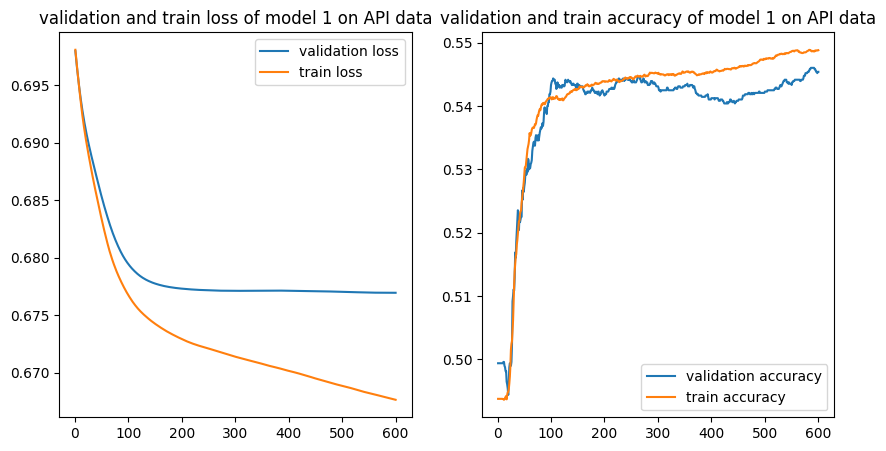

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5));
ax1.plot(epochs_1,new_model1_val_loss, label='validation loss')
ax1.plot(epochs_1,new_model1_train_loss, label='train loss')
ax1.set_title('validation and train loss of model 1 on API data')
ax1.legend();

ax2.plot(epochs_1,new_model1_val_acc, label='validation accuracy')
ax2.plot(epochs_1,new_model1_train_acc, label='train accuracy')
ax2.set_title('validation and train accuracy of model 1 on API data')
ax2.legend();



Analysis: It can be seen with the graphs that after the 100th epoch the loss tends to separate from eachother, however accuracy of the model of both validation and training sets tends to be similar up until the 200th epoch. The accuracy of this model still needs to be improve in order to produce better predictions. 

Plots of accuracy and loss for model 2 on API data:

<Figure size 640x480 with 0 Axes>

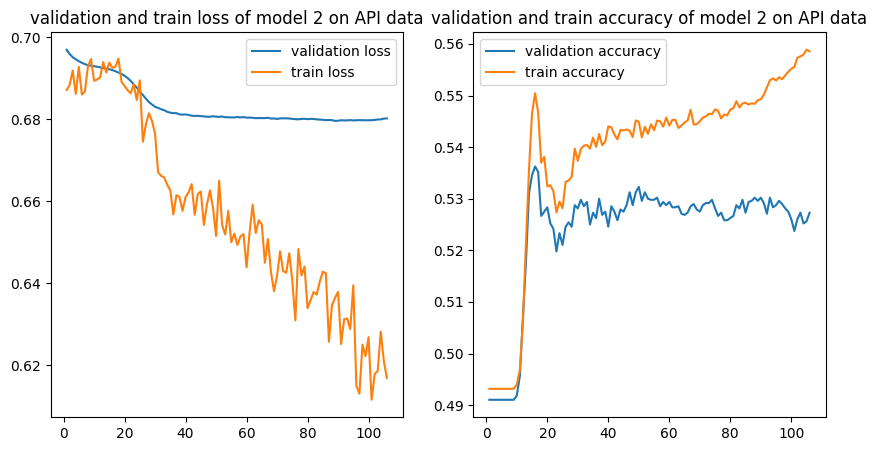

In [ ]:
plt.figure();
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5));
ax1.plot(epochs_2,new_model2_val_loss, label='validation loss')
ax1.plot(epochs_2,new_model2_train_loss, label='train loss')
ax1.set_title('validation and train loss of model 2 on API data')
ax1.legend();

ax2.plot(epochs_2,new_model2_val_acc, label='validation accuracy')
ax2.plot(epochs_2,new_model2_train_acc, label='train accuracy')
ax2.set_title('validation and train accuracy of model 2 on API data')
ax2.legend();






Analysis: It can be seen by the graphs that there is a great decrease in training loss while validation loss stagnates, this is a symptom of overfitting even with the early stopping mechnism being used. However one beneficial insight into a model like this is that there is a gradual improvement to the training accuracy. Meaning that model is able to find trends in the data to make accurate predictions, therefore making it more of a regularization problem to solve.  

Plots of accuracy and loss for model 1 on Kaggle data:

<Figure size 640x480 with 0 Axes>

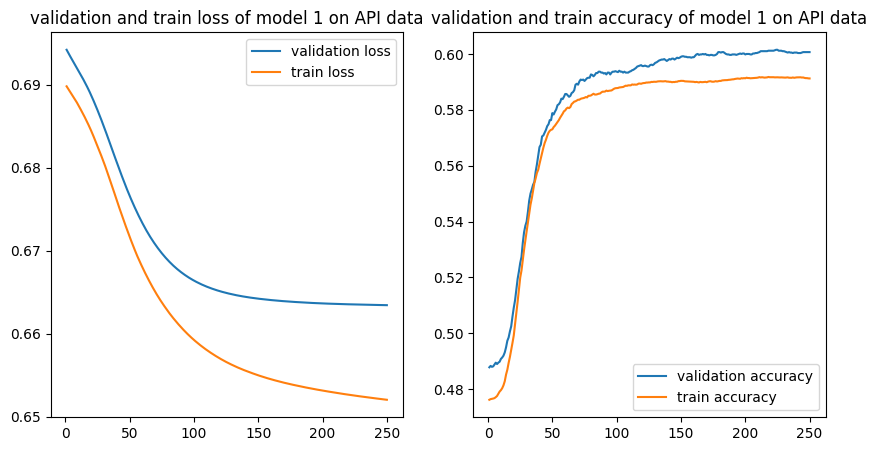

In [ ]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(epochs_3,old_model1_val_loss, label='validation loss')
ax1.plot(epochs_3,old_model1_train_loss, label='train loss')
ax1.set_title('validation and train loss of model 1 on API data')
ax1.legend();

ax2.plot(epochs_3,old_model1_val_acc, label='validation accuracy')
ax2.plot(epochs_3,old_model1_train_acc, label='train accuracy')
ax2.set_title('validation and train accuracy of model 1 on API data')
ax2.legend();



Analysis: In comparison to the model 1 being used on the API dataset, there is much improvement in both loss and accuracy for the kaggle dataset. Both the validation and training losses trend in the same direction until validation loss stagnates around the 200th epoch. As for accuracy it also trends in the same direction and stabilize around the same time as well. Tuning of the hyperparameter could potential allow this solution to reach better predictions, without adding complexity to the model.  

Plots of accuracy and loss for model 3 on Kaggle data:

<Figure size 640x480 with 0 Axes>

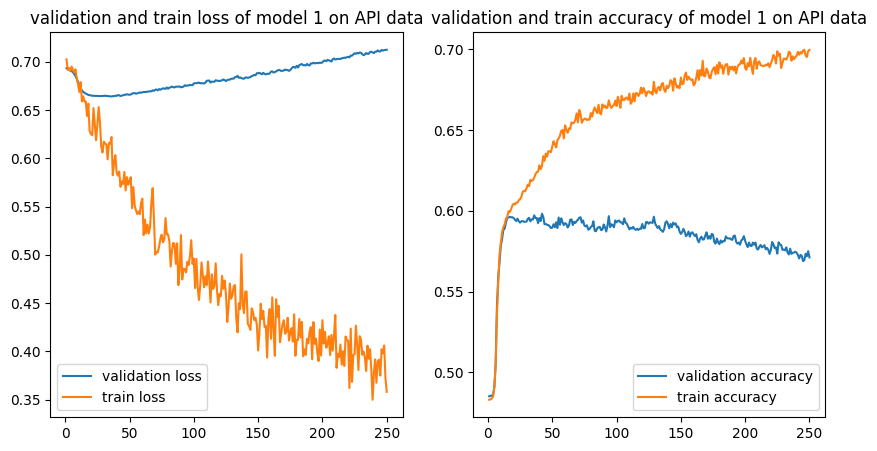

In [ ]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(epochs_4,old_model3_val_loss, label='validation loss')
ax1.plot(epochs_4,old_model3_train_loss, label='train loss')
ax1.set_title('validation and train loss of model 1 on API data')
ax1.legend();

ax2.plot(epochs_4,old_model3_val_acc, label='validation accuracy')
ax2.plot(epochs_4,old_model3_train_acc, label='train accuracy')
ax2.set_title('validation and train accuracy of model 1 on API data')
ax2.legend();


Analysis: Once again there is a trend of overfitting within the more complex model, even with the simpler feature vector the Kaggle dataset provides. However in this case both accuracies are rather good even if the model has poor generalization. For a future model thats goal is to correctly predict DOTA2 matches, this one may be the most promising to develop as it as the validation and test accuracy can be improved through more regularization.

> Table of Models and Their Scores
> ![model 1](https://drive.google.com/uc?export=view&id=1tafk8xog7wk-dfgtz5dOF0jh8hJdCGWd) 


From this table it can seen that the models had better performance on the feature vectors produced from the older match data of the Kaggle dataset. The worst performing model was the complex M2 model taking in a input of data from recent matches from the API, however with the previous anaylsis of the graphs it was more likely to be caused by an overfitting issue. The models ran on the old kaggle data set are the ones that are closest to the results of the Standford Project [1], which furthers the narrative that a problem solution of this nature may be increasing in difficulty as new heroes are added to the game. However these issues may be minimized with the implemenation of improved regularization techniques, and hyperparameter tuning and searching, which will bring the loss and accuracy of the validation sets closer to that of the training set.


## **Conclusions**

Summarize what you could and could not conclude based on your experiments. 
In this section, you can add **text**.



To summarise from the findings of this project, the proposed goal of a model with a prediction accuracy of 70% was not reached. However, with further developments of the models through regularization technique and hyperparameter tuning, there can still be a promising solution at hand. One conclusion that can be made is that the results of the models, in comparison to each other, reveal a trend, which is that as DOTA2 receives updates, many of which including new heroes, it becomes more difficult to accurately predict match outcomes with hero picks alone. Thus future developments to the feature vector in order for it to include more factors such as bans, and pick order could allow the models to come to a correct decisision more consistently. 

What cannot be concluded from the work done from this project is the best overall model for such a problem, although it might seem at first that the simpler models would be the way to go, the resulting accuracies produced tend to stagnate rather quickly once past 50%. Thus one could take the approach of the lower performing, higher complexity model route and try to solve its generalization issues instead. However as previously mentioned the project, does not provide enough information for a clear cut solution unless further work is done. 

A future development to the project is to continually update models as the new patches to DOTA2 arrive to make sure the predictions stay up to date with the changes to the game. Another development will be a recommendation engine similar to the one proposed in the Stanford project [1]. As creating application that can recommend heroes based off the models' past match predictions provides a more accessible way for players to solve the problem of which heroes to pick in order to win games.    

## **References**
Citations to similar projects, datasets, and API documentation can be seen below:

[1] Conley, K., Perry, D., "How Does He Saw Me? A Recommendation Engine For Picking Heroes in DOTA 2", *Stanford University*, 2013, [Online], Available:   https://cs229.stanford.edu/proj2013/PerryConley-HowDoesHeSawMeARecommendationEngineForPickingHeroesInDota2.pdf 

[2] OpenDota, OpenDota API V19.0.0, https://docs.opendota.com/ 

[3] Anzelmo, D., "Dota 2 Matches", *Kaggle*, 2020, [Online], Available: https://www.kaggle.com/datasets/devinanzelmo/dota-2-matches 